<a href="https://www.kaggle.com/code/ahmeterdemyenay/eda-logistic-regression?scriptVersionId=190587788" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

* This notebook provides a comprehensive exploratory data analysis (EDA) and logistic regression implementation using the "Personal Key Indicators of Heart Disease" dataset. The EDA section explores the dataset's features through descriptive statistics and visualizations to uncover patterns and relationships. The analysis includes handling categorical variables, visualizing distributions, and identifying correlations. Following the EDA, the notebook builds a logistic regression model to predict heart disease, detailing the model's training process, performance evaluation, and interpretation of results. This approach aims to provide insights into key health indicators and their impact on heart disease prediction.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session,

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


# Load and Check Data

In [2]:
df = pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Exploratory Data Analysis

## Count plot for HeartDisease with hue for Sex and AgeCategory

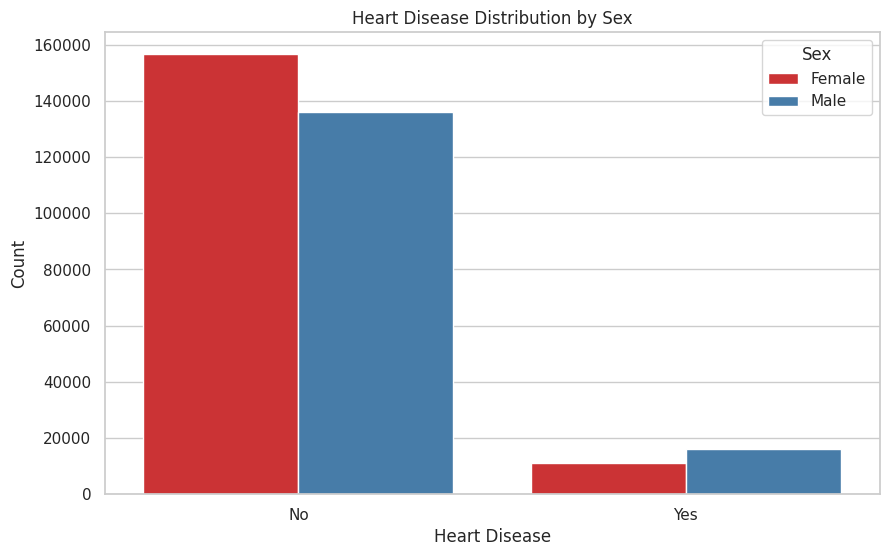

In [4]:
# Plotting a count plot for HeartDisease with hue for Sex
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='HeartDisease', hue='Sex', palette='Set1')
plt.title('Heart Disease Distribution by Sex')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

* Prevalence of No Heart Disease:
    - The plot shows that the majority of both males and females do not have heart disease. The counts are significantly higher for both genders in the "No" category, with females having a slightly higher count than males.


* Heart Disease in Males:
    - There is a noticeable number of males with heart disease compared to females. The blue bar representing males in the "Yes" category is higher than the red bar for females, indicating that males are more frequently affected by heart disease in this dataset.


* Heart Disease in Females:
    - While the count of females with heart disease is lower than that of males, there is still a significant number of females affected. The red bar for females in the "Yes" category, though smaller, represents a considerable portion of the population.


* Gender Comparison:
    - The plot highlights a gender disparity in heart disease prevalence, with males showing a higher incidence rate compared to females. This could suggest potential gender-specific risk factors or differences in lifestyle, healthcare access, or biological susceptibility.


* Overall Distribution:
    - The overall distribution suggests that while heart disease affects a smaller portion of the population compared to those without it, it remains a significant health concern, particularly among males.

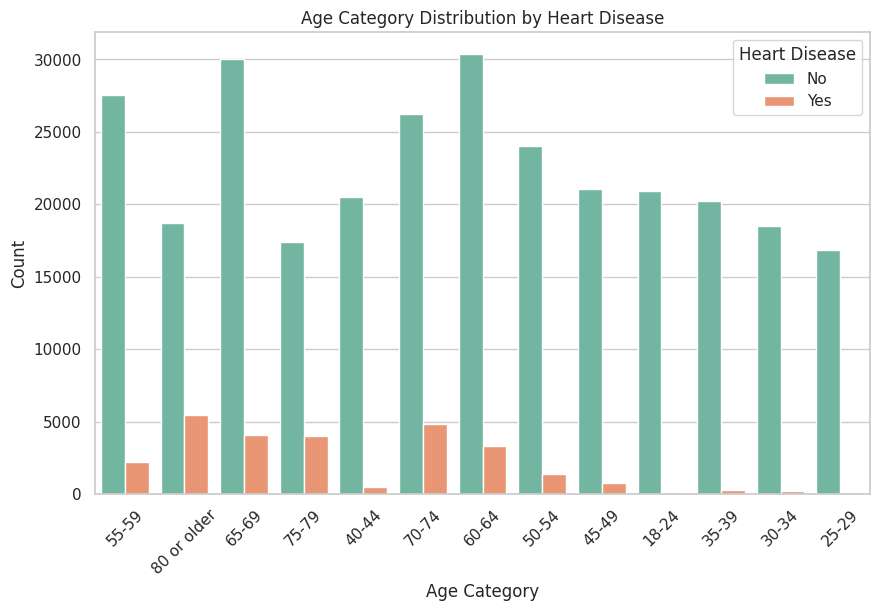

In [5]:
# Plotting a count plot for HeartDisease with hue for AgeCategory
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeCategory', hue='HeartDisease', palette='Set2')
plt.title('Age Category Distribution by Heart Disease')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=45)
plt.show()

* Prevalence Across Age Categories:
    - The plot shows that heart disease is present in all age categories, but its prevalence varies significantly. Generally, the number of individuals without heart disease (represented by the teal bars) is higher in all age categories compared to those with heart disease (represented by the orange bars).


* Higher Incidence in Older Age Groups:
    - The older age groups (e.g., 65-69, 70-74, 75-79, 80 or older) show a higher count of heart disease cases compared to the younger age groups. This trend suggests that heart disease becomes more common as age increases, which is consistent with known risk factors related to aging.


* Significant Heart Disease Cases in 65-74 Age Range:
    - The age categories 65-69 and 70-74 have particularly high counts of heart disease cases. This indicates that these age ranges might be critical for targeted interventions and preventive measures to manage heart disease risk.


* Lower Incidence in Younger Age Groups:
    - The younger age categories (e.g., 18-24, 25-29, 30-34) have a relatively low count of heart disease cases. This could suggest that younger individuals are less affected by heart disease, which aligns with the general understanding that heart disease risk increases with age.


* Notable Counts in Middle Age Groups:
    - The middle age categories (e.g., 45-49, 50-54, 55-59) show a moderate number of heart disease cases. These age groups might represent a transitional phase where the risk of heart disease starts to become more prominent.


* Public Health Implications:
    - The distribution indicates that heart disease interventions should be particularly focused on older adults, especially those in their late 60s and early 70s. Preventive healthcare strategies, lifestyle modifications, and regular screenings in these age groups could potentially reduce the incidence of heart disease.

## Venn Diagram for Heart Disease, Smoking and Diff Walking

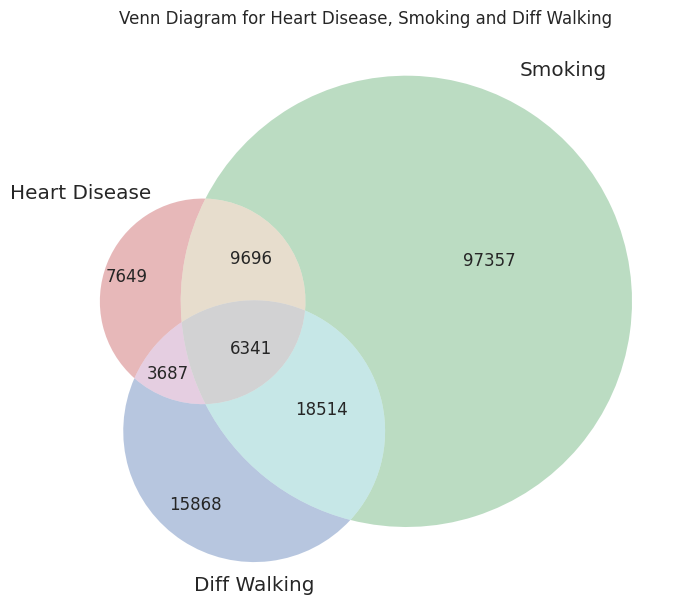

In [6]:
from matplotlib_venn import venn3

# Verileri setlere dönüştürme
set1 = set(df[df['HeartDisease'] == 'Yes'].index)
set2 = set(df[df['Smoking'] == 'Yes'].index)
set3 = set(df[df['DiffWalking'] == 'Yes'].index)

# Venn diagram çizme
plt.figure(figsize=(8, 8))
venn3([set1, set2, set3], ('Heart Disease', 'Smoking', 'Diff Walking'))
plt.title('Venn Diagram for Heart Disease, Smoking and Diff Walking')
plt.show()

* Heart Disease and Smoking Overlap:
    - The Venn diagram indicates that a significant number of individuals with heart disease also smoke. The overlap between the Heart Disease and Smoking circles suggests a potential correlation between smoking and the incidence of heart disease.


* Diff Walking and Smoking Overlap:
    - There is a notable intersection between the Diff Walking and Smoking circles. This indicates that many individuals who experience walking difficulties are also smokers. This overlap could point to smoking as a contributing factor to mobility issues.


* Heart Disease, Diff Walking, and Smoking Intersection:
    - The central overlap area where all three circles intersect shows the number of individuals who have heart disease, smoke, and have difficulty walking. This group represents a high-risk population with multiple health issues, potentially requiring targeted healthcare interventions.


* Smoking Predominance:
    - The Smoking circle is the largest, indicating that the number of smokers is higher compared to those with heart disease or walking difficulties. This suggests that smoking is a prevalent issue within the population and could be a common underlying factor affecting other health conditions.

## Frequency Distribution of Health-Related Factors

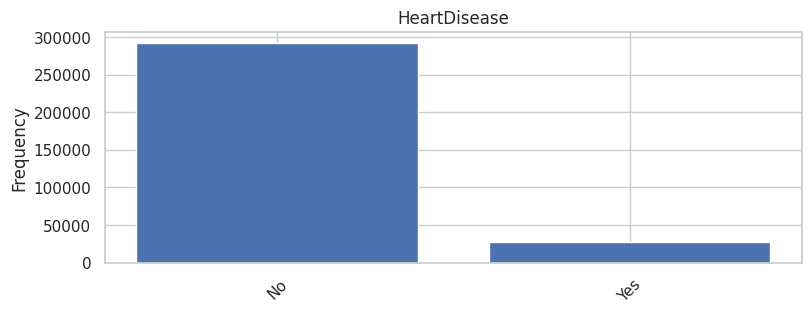

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


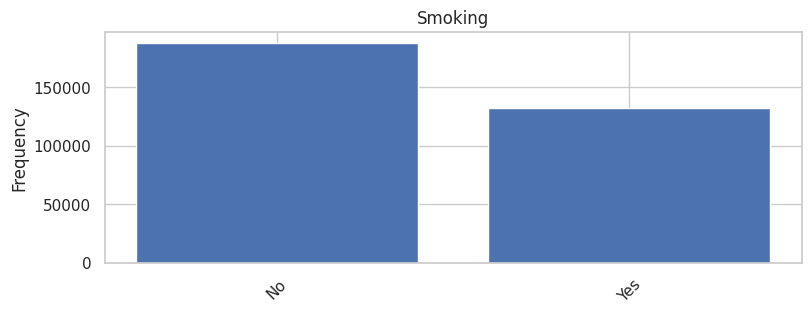

Smoking
No     187887
Yes    131908
Name: count, dtype: int64


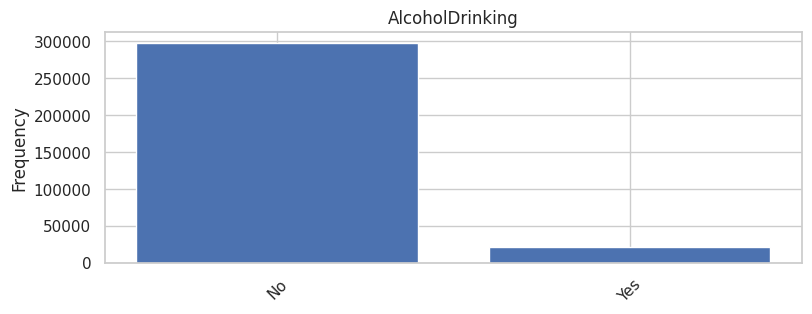

AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64


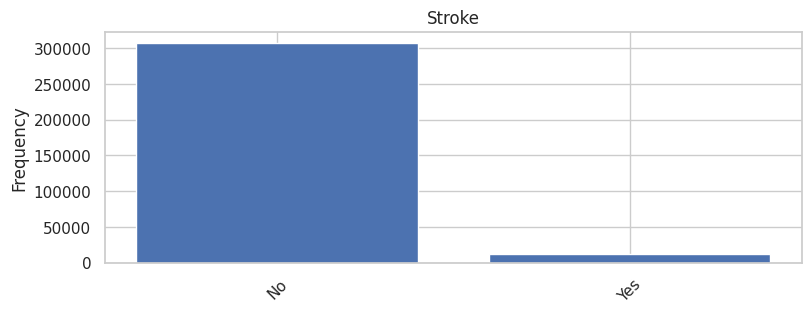

Stroke
No     307726
Yes     12069
Name: count, dtype: int64


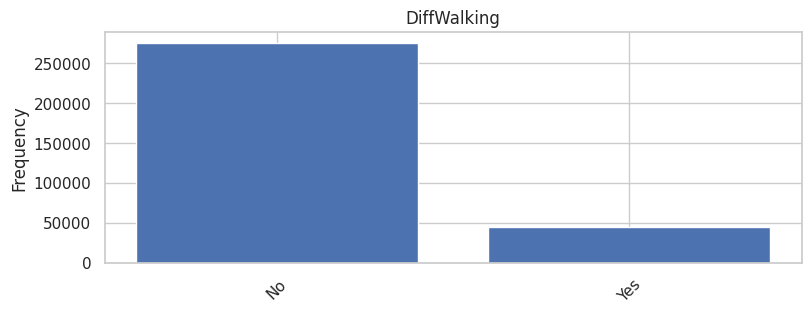

DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64


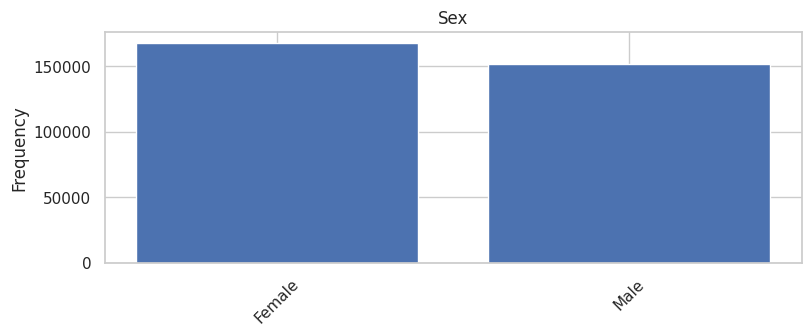

Sex
Female    167805
Male      151990
Name: count, dtype: int64


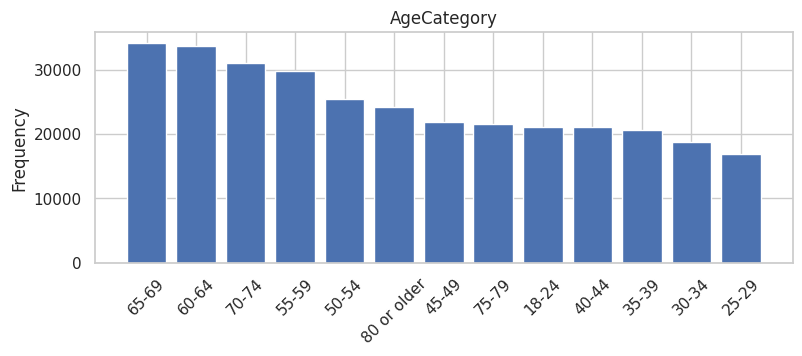

AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64


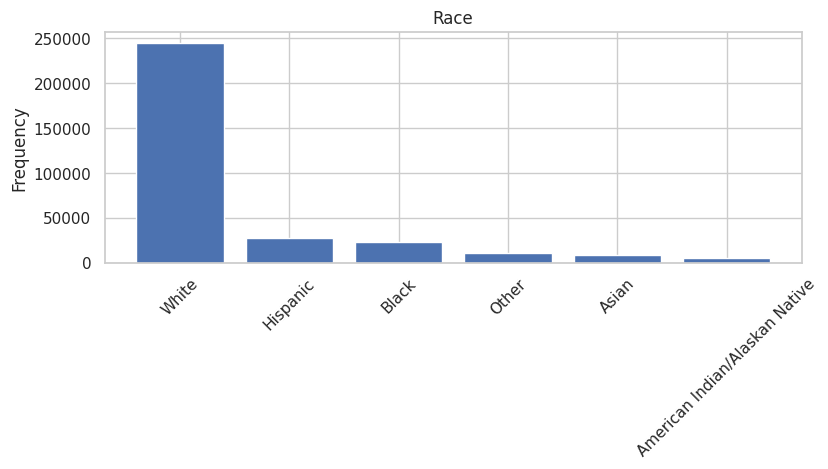

Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: count, dtype: int64


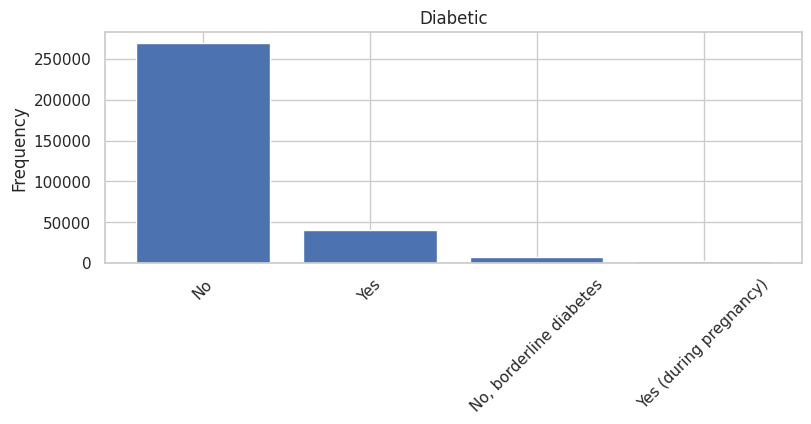

Diabetic
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: count, dtype: int64


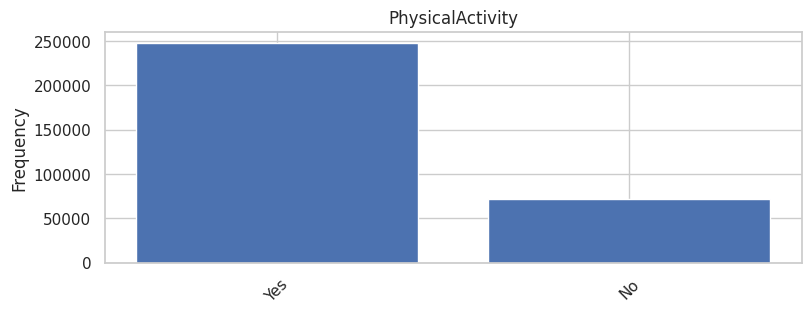

PhysicalActivity
Yes    247957
No      71838
Name: count, dtype: int64


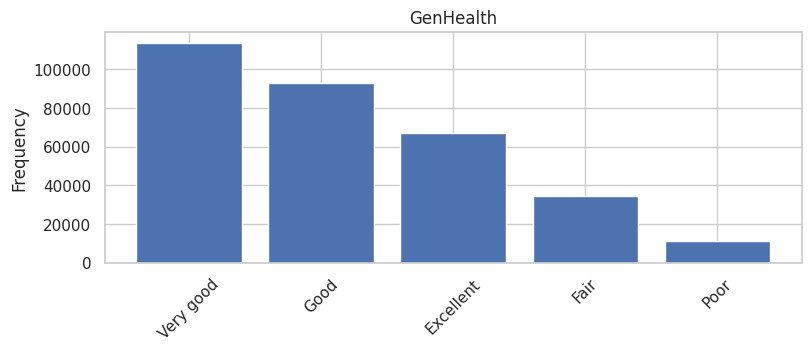

GenHealth
Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: count, dtype: int64


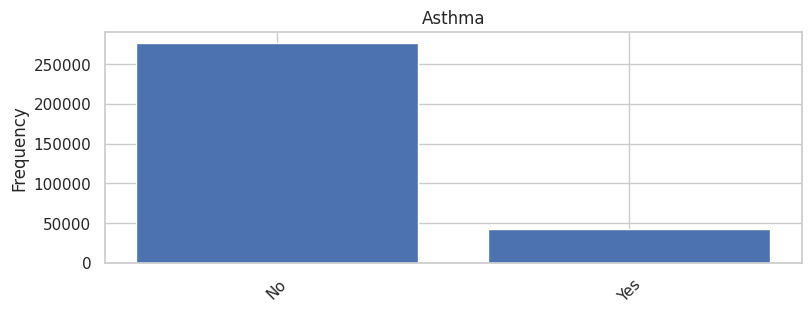

Asthma
No     276923
Yes     42872
Name: count, dtype: int64


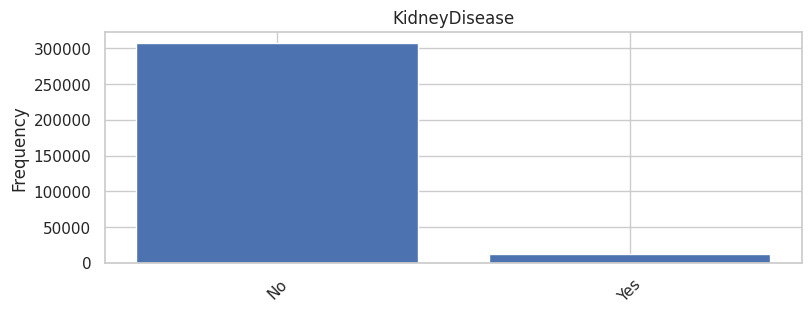

KidneyDisease
No     308016
Yes     11779
Name: count, dtype: int64


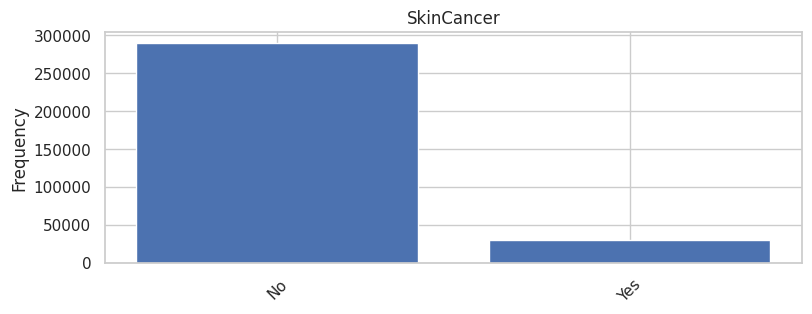

SkinCancer
No     289976
Yes     29819
Name: count, dtype: int64


In [7]:
def bar_plot(variable):
    """
        input: variable ex.: "Smoking"
        output: bar plot & value count
    """
    
    # get feature
    var = df[variable]
    # count number of categorical variable (value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values, rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.grid(True)  # Add grid lines
    plt.show()
    print(varValue)

category1 = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]
for c in category1:
    bar_plot(c)

## Analysis of Physical and Mental Health's Impact on Sleep Time

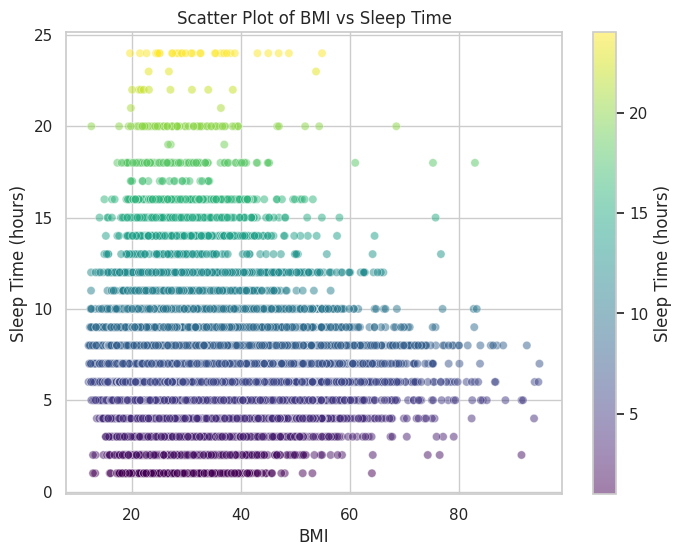

In [8]:
# Scatter Plot: BMI vs SleepTime
plt.figure(figsize=(8, 6))
plt.scatter(df['BMI'], df['SleepTime'], alpha=0.5, c=df['SleepTime'], cmap='viridis', edgecolors='w', linewidth=0.5)
plt.colorbar(label='Sleep Time (hours)')
plt.xlabel('BMI')
plt.ylabel('Sleep Time (hours)')
plt.title('Scatter Plot of BMI vs Sleep Time')
plt.grid(True)
plt.show()

* The scatter plot reveals that there is no straightforward correlation between BMI and sleep time. Individuals with varying BMI values experience different amounts of sleep, with most individuals tending to have sleep durations between 5 and 15 hours regardless of their BMI. The presence of outliers and the spread of data points across the BMI and sleep time spectrum suggest that other factors might influence sleep duration and BMI, requiring a more in-depth analysis to uncover any potential underlying patterns or causes.

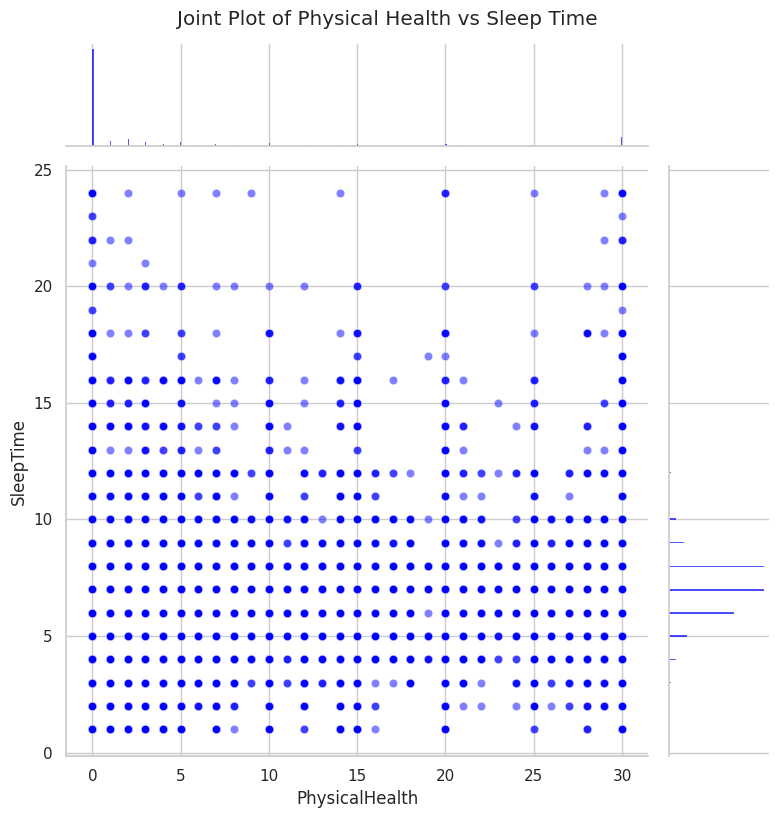

In [9]:
# Joint Plot: PhysicalHealth vs SleepTime
sns.jointplot(x='PhysicalHealth', y='SleepTime', data=df, kind='scatter', height=8, color='blue', alpha=0.5)
plt.suptitle('Joint Plot of Physical Health vs Sleep Time', y=1.02)
plt.show()

* The joint plot of Physical Health versus Sleep Time reveals a diverse relationship between the number of days individuals experience poor physical health and their sleep duration. The scatter plot, complemented by marginal histograms, shows that most individuals, regardless of their physical health status, tend to sleep between 5 to 15 hours. This suggests a general trend in sleep duration among the population. There is no clear linear correlation between the number of poor physical health days and sleep time, indicating that other factors might significantly influence sleep patterns. 

* The marginal histograms also highlight that a majority of individuals report between 0 and 10 days of poor physical health, further emphasizing the concentration of data points in this range. The presence of high sleep durations in individuals with significant physical health issues could warrant further investigation to understand underlying causes, such as medication, sleep disorders, or other factors.

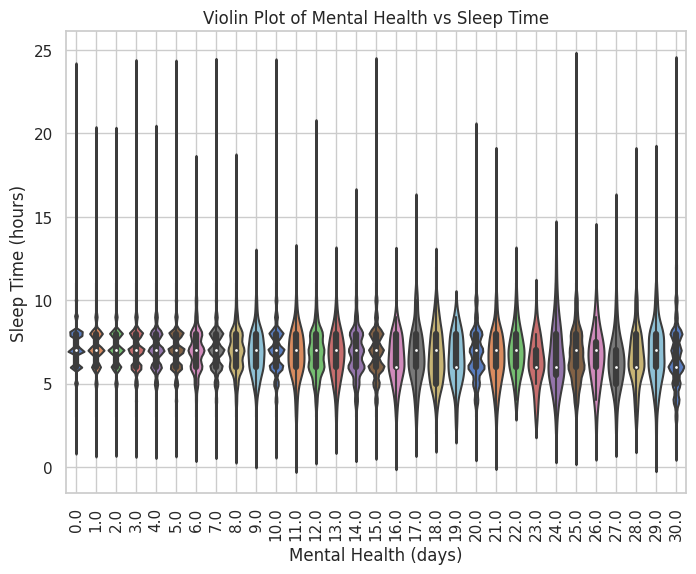

In [10]:
# Violin Plot: MentalHealth vs SleepTime
plt.figure(figsize=(8, 6))
sns.violinplot(x='MentalHealth', y='SleepTime', data=df, palette='muted', scale='width')
plt.xlabel('Mental Health (days)')
plt.ylabel('Sleep Time (hours)')
plt.title('Violin Plot of Mental Health vs Sleep Time')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

* The violin plot illustrating the relationship between Mental Health and Sleep Time provides a detailed view of how sleep duration varies across different days of poor mental health. The plot shows that most individuals, regardless of their mental health status, tend to have sleep durations between 5 to 10 hours. This consistent sleep pattern across varying levels of mental health suggests that sleep duration remains relatively stable even as mental health conditions fluctuate. 

* However, individuals with higher days of poor mental health exhibit a more concentrated range of sleep times, indicating that poor mental health might influence a more uniform sleep pattern. The distribution also reveals instances of very high sleep durations, which are rare but present across various mental health days, potentially indicating severe cases that may require further investigation. Overall, while there is no clear trend or correlation between the number of poor mental health days and sleep time, the plot provides valuable insights into the distribution of sleep patterns in relation to mental health conditions.

# Unique Values in Categorical Variables

In [11]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [12]:
# Unique values in categorical features
unique_age_category = df['AgeCategory'].unique()
unique_race = df['Race'].unique()
unique_gen_health = df['GenHealth'].unique()

# Print unique values in a readable format
print(f"Unique values in AgeCategory:\n{', '.join(unique_age_category)}\n")
print(f"Unique values in Race:\n{', '.join(unique_race)}\n")
print(f"Unique values in GenHealth:\n{', '.join(unique_gen_health)}\n")

Unique values in AgeCategory:
55-59, 80 or older, 65-69, 75-79, 40-44, 70-74, 60-64, 50-54, 45-49, 18-24, 35-39, 30-34, 25-29

Unique values in Race:
White, Black, Asian, American Indian/Alaskan Native, Other, Hispanic

Unique values in GenHealth:
Very good, Fair, Good, Poor, Excellent



# Converting Categorical Variables to Numerical

In [13]:
# Convert categorical variables to numerical
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
df['AlcoholDrinking'] = df['AlcoholDrinking'].map({'Yes': 1, 'No': 0})
df['Stroke'] = df['Stroke'].map({'Yes': 1, 'No': 0})
df['DiffWalking'] = df['DiffWalking'].map({'Yes': 1, 'No': 0})
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df['Diabetic'] = df['Diabetic'].map({'Yes': 1, 'No': 0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1})
df['PhysicalActivity'] = df['PhysicalActivity'].map({'Yes': 1, 'No': 0})
df['Asthma'] = df['Asthma'].map({'Yes': 1, 'No': 0})
df['KidneyDisease'] = df['KidneyDisease'].map({'Yes': 1, 'No': 0})
df['SkinCancer'] = df['SkinCancer'].map({'Yes': 1, 'No': 0})

In [14]:
# Factorize AgeCategory, Race, and GenHealth and get the mapping
age_category_codes, age_category_uniques = pd.factorize(df['AgeCategory'])
race_codes, race_uniques = pd.factorize(df['Race'])
gen_health_codes, gen_health_uniques = pd.factorize(df['GenHealth'])

# Assign factorized codes back to the dataframe
df['AgeCategory'] = age_category_codes
df['Race'] = race_codes
df['GenHealth'] = gen_health_codes

# Print the mappings
print("AgeCategory Mapping:")
for code, unique in enumerate(age_category_uniques):
    print(f"{unique}: {code}")

print("\nRace Mapping:")
for code, unique in enumerate(race_uniques):
    print(f"{unique}: {code}")

print("\nGenHealth Mapping:")
for code, unique in enumerate(gen_health_uniques):
    print(f"{unique}: {code}")

AgeCategory Mapping:
55-59: 0
80 or older: 1
65-69: 2
75-79: 3
40-44: 4
70-74: 5
60-64: 6
50-54: 7
45-49: 8
18-24: 9
35-39: 10
30-34: 11
25-29: 12

Race Mapping:
White: 0
Black: 1
Asian: 2
American Indian/Alaskan Native: 3
Other: 4
Hispanic: 5

GenHealth Mapping:
Very good: 0
Fair: 1
Good: 2
Poor: 3
Excellent: 4


In [15]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,0,0,1,1,0,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,0,0,1,0,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,2,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,3,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,0,1,0,8.0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

# Logistic Regression

In [17]:
# Separate features and labels
y = df.HeartDisease.values
x = df.drop(["HeartDisease"], axis=1)

In [18]:
# Normalization
x = (x - x.min()) / (x.max() - x.min())

In [19]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# Sklearn with Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
print("Test accuracy (sklearn): {}".format(lr.score(x_test, y_test)))

Test accuracy (sklearn): 0.9133820103503807
